In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import itertools
from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering

## 2013 Boston Marathon Data

Use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

In [2]:
marathon_data = pd.read_csv('C:\\Users\\david\Desktop\\thinkful datasets\\2013_Boston_Marathon.csv')

In [3]:
marathon_data.head(5)

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [4]:
marathon_data.describe()

,age,division,official,overall,pace,genderdiv
count,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000
mean,41.638332,1100.967025,208.159470,8429.373422,7.947398,4351.684732
std,10.351311,942.114816,23.743608,5052.024116,0.905739,2772.398239
min,18.000000,1.000000,85.530000,1.000000,3.270000,1.000000
25%,34.000000,363.000000,191.727500,4061.750000,7.320000,2032.750000
50%,42.000000,842.000000,209.225000,8247.500000,7.980000,4113.500000
75%,49.000000,1560.000000,225.230000,12662.250000,8.600000,6316.000000
max,80.000000,3834.000000,284.230000,17598.000000,10.850000,10648.000000


In [5]:
marathon_data.dtypes

25k           object
age            int64
name          object
division       int64
10k           object
gender        object
half          object
official     float64
bib           object
ctz           object
country       object
overall        int64
pace         float64
state         object
30k           object
5k            object
genderdiv      int64
20k           object
35k           object
city          object
40k           object
dtype: object

In [6]:
marathon_data.shape

(16164, 21)

In [7]:
null_count = marathon_data.isnull().sum()
null_count[null_count>0]

ctz      15407
state     1463
city         1
dtype: int64

In [8]:
marathon_data.columns

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'ctz', 'country', 'overall', 'pace', 'state', '30k', '5k',
       'genderdiv', '20k', '35k', 'city', '40k'],
      dtype='object')

In [9]:
#change gender to numeric columns

marathon_data['gender'] = np.where(marathon_data['gender']=='M',1,0)

In [10]:
#drop uneeded columns

marathon_data = marathon_data.drop(['name', 'ctz', 'state', 'bib', 'country', 'city', 'genderdiv'], axis=1)

In [11]:
marathon_data.shape

(16164, 14)

In [12]:
marathon_data.head(5)

,25k,age,division,10k,gender,half,official,overall,pace,30k,5k,20k,35k,40k
0,49.87,28,9,18.18,1,40.93,90.90,9,3.47,62.07,8.90,38.80,74.73,85.55
1,77.27,30,5,30.90,1,64.90,132.50,5,5.07,92.97,15.90,61.52,108.78,124.77
2,77.23,23,1,30.90,1,64.92,130.37,1,4.98,92.72,15.93,61.53,108.68,123.78
3,50.50,32,5,18.73,1,42.00,88.43,5,3.38,61.35,8.98,39.88,73.00,83.43
4,48.75,39,3,18.18,1,40.57,87.22,3,3.33,59.92,8.92,38.55,71.68,81.88


In [13]:
marathon_data.isnull().values.any()


False

In [14]:
#Checking out the remaining columns

marathon_data.dtypes

25k          object
age           int64
division      int64
10k          object
gender        int32
half         object
official    float64
overall       int64
pace        float64
30k          object
5k           object
20k          object
35k          object
40k          object
dtype: object

In [15]:
#Changing columns to floats

number_columns = marathon_data.columns

In [16]:
marathon_data[number_columns] = marathon_data[number_columns].apply(pd.to_numeric, errors = 'coerce', axis=1)
print(marathon_data.dtypes)

25k         float64
age         float64
division    float64
10k         float64
gender      float64
half        float64
official    float64
overall     float64
pace        float64
30k         float64
5k          float64
20k         float64
35k         float64
40k         float64
dtype: object


In [17]:
marathon_data.isnull().values.any()

True

In [18]:
#dropping any NA values
marathon_data.dropna(inplace=True)

In [19]:
marathon_data.shape

(16054, 14)

In [20]:
marathon_data['official'].mean()

208.1594886009717

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# Make sure the number of rows divides evenly into four samples.
rows = marathon_data.shape[0] - marathon_data.shape[0] % 4
marathon_data = marathon_data.iloc[:rows, :]

X = marathon_data
# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

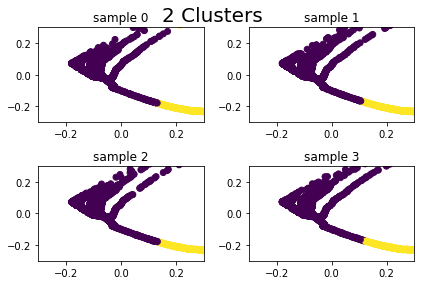

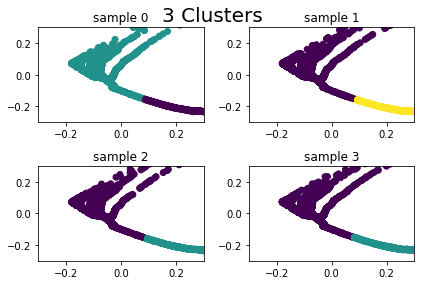

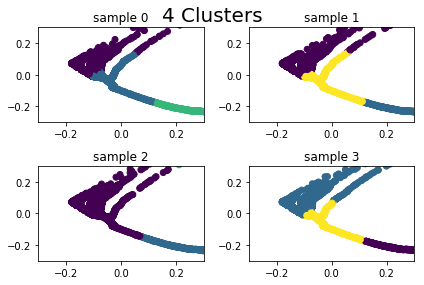

In [22]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [45]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=10, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.5168385250865526
0.5159835441485352
0.4997702643870874
0.5206516759515645


In [46]:

cluster_pred  = KMeans(n_clusters=10, random_state=42).fit_predict(X)
X_pred = X.copy()
X_pred['clusters'] = cluster_pred

cluster_dataframes = {}
for n_clust in range(2):
    cluster_dataframes[n_clust] = X_pred.loc[X_pred['clusters'] == n_clust]

for name, frame in cluster_dataframes.items():
    print(name)
    print(frame.describe())

0
               25k          age     division          10k       gender  \
count  2036.000000  2036.000000  2036.000000  2036.000000  2036.000000   
mean    112.266793    40.312377   960.487721    44.645373     0.722495   
std       3.781909     9.348805   868.745590     1.822431     0.447878   
min      92.480000    19.000000     1.000000    35.930000     0.000000   
25%     110.030000    33.000000   401.000000    43.520000     0.000000   
50%     112.650000    41.000000   657.000000    44.790000     1.000000   
75%     114.985000    47.000000   964.500000    45.900000     1.000000   
max     122.150000    73.000000  2788.000000    50.530000     1.000000   

              half     official      overall         pace          30k  \
count  2036.000000  2036.000000  2036.000000  2036.000000  2036.000000   
mean     94.417245   196.642146  5096.147839     7.508070   136.012618   
std       3.433711     2.795909   610.776446     0.106889     3.940242   
min      76.880000   191.500000  40

In [47]:
boston_avg = X_pred.groupby(['clusters'], as_index=False).mean()
print(boston_avg)

   clusters         25k        age     division        10k    gender  \
0         0  112.266793  40.312377   960.487721  44.645373  0.722495   
1         1  125.994435  33.338710  2668.175403  49.631109  0.184476   
2         2   97.386509  34.736280   438.345020  38.776184  0.945122   
3         3  125.573358  49.562174   642.118392  49.665689  0.523455   
4         4  135.610227  51.683367   874.204409  52.765551  0.461590   
5         5  121.718254  40.884080  1270.105970  48.235378  0.432338   
6         6  106.626968  37.746667  1046.720988  42.505215  0.887901   
7         7  132.685875  32.414125  3516.197432  51.391429  0.155698   
8         8  117.591451  41.852483   993.311587  46.700316  0.599805   
9         9  130.254960  50.597739   744.650931  51.276237  0.467420   

         half    official       overall      pace         30k         5k  \
0   94.417245  196.642146   5096.147839  7.508070  136.012618  22.427687   
1  105.584093  223.649103  12233.690524  8.538367  153.

In [49]:
boston_avg.sort_values(by='pace')

,clusters,25k,age,division,10k,gender,half,official,overall,pace,30k,5k,20k,35k,40k
2,2,97.386509,34.736280,438.345020,38.776184,0.945122,82.049075,168.211504,970.775407,6.423643,117.625513,19.444502,77.811214,138.309710,159.015401
6,6,106.626968,37.746667,1046.720988,42.505215,0.887901,89.783486,185.669709,2996.464198,7.089363,128.955694,21.359002,85.132514,151.989822,175.342820
0,0,112.266793,40.312377,960.487721,44.645373,0.722495,94.417245,196.642146,5096.147839,7.508070,136.012618,22.427687,89.510472,160.678929,185.649150
8,8,117.591451,41.852483,993.311587,46.700316,0.599805,98.891144,205.490180,7230.863194,7.845346,142.473827,23.423262,93.745375,168.212303,194.137882
5,5,121.718254,40.884080,1270.105970,48.235378,0.432338,102.258234,213.436353,9395.466169,8.149005,147.675194,24.190955,96.926891,174.633408,201.639910
3,3,125.573358,49.562174,642.118392,49.665689,0.523455,105.444341,220.941958,11518.292628,8.434996,152.492934,24.903693,99.939062,180.510179,208.605272
1,1,125.994435,33.338710,2668.175403,49.631109,0.184476,105.584093,223.649103,12233.690524,8.538367,153.495323,24.869929,100.049738,182.204556,211.204224
9,9,130.254960,50.597739,744.650931,51.276237,0.467420,109.194694,230.694634,13994.935505,8.807008,158.564594,25.671516,103.479914,188.150426,217.785086
7,7,132.685875,32.414125,3516.197432,51.391429,0.155698,110.438539,242.239149,15928.412520,9.247079,163.087608,25.616340,104.561011,195.463210,228.613756
4,4,135.610227,51.683367,874.204409,52.765551,0.461590,113.185571,244.740140,16460.138277,9.342759,166.088170,26.311910,107.207715,198.446620,230.800842
